## Deep Convolutional GAN on Fashion-MNIST

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

%matplotlib inline

In [28]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', one_hot = True, reshape= False)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [29]:
X_train = data.train.images
y_train = data.train.labels

X_test = data.test.images
y_test = data.test.labels

In [31]:
print (X_train.shape)


(55000, 28, 28, 1)


TypeError: Invalid dimensions for image data

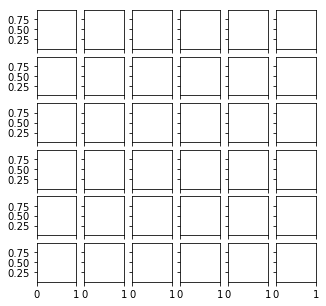

In [36]:
idx = np.random.randint(0, X_train.shape[3], size=1)
fig, axes = plt.subplots(6, 6, sharex=True, sharey=True, figsize=(5,5),)
for ii, ax in zip(idx, axes.flatten()):
    ax.imshow(X_train[ii, :,:,:], aspect='equal')
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
plt.subplots_adjust(wspace=0, hspace=0)

In [37]:
import matplotlib
def plot_images_together(images):
    fig = plt.figure()
    images = [image[:, :] for image in images]
    image = np.concatenate(images, axis=1)
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(image, cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.show()

def plot_10_by_10_images(images):
    fig = plt.figure()
    images = [image[3:25, 3:25] for image in images]
    #image = np.concatenate(images, axis=1)
    for x in range(10):
        for y in range(10):
            ax = fig.add_subplot(10, 10, 10*y+x)
            ax.matshow(images[10*y+x], cmap = matplotlib.cm.binary)
            plt.xticks(np.array([]))
            plt.yticks(np.array([]))
    plt.show()

In [38]:
plot_10_by_10_images(X_train[1:])

ValueError: num must be 1 <= num <= 100, not 0

ValueError: too many values to unpack (expected 2)

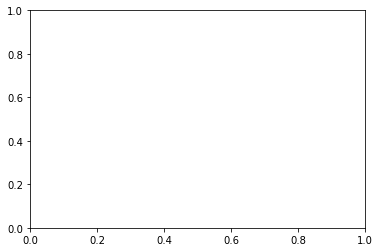

In [39]:
plot_images_together(X_train)

## Building the Model - DCGAN

In [40]:
def input_placeholders(real, fake):
    X_real = tf.placeholder(tf.float32, shape=[None, *real], name="X_real")
    X_fake = tf.placeholder(tf.float32, shape=[None, *fake], name="X_fake")
    
    return X_real, X_fake